# Linear Regression Algorithm
Supervised Machine Learning

1. Based on : f(x) = c + mx 

2. LINEAR equation

### Import important Libraries

In [137]:
import matplotlib.pyplot as plt   # To plot a graph
from matplotlib import rcParams
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc

In [138]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from collections import Counter

In [139]:
from scipy.stats import normaltest

### mtcars Dataset
Target - mpg

In [140]:
data = pd.read_csv("mtcars.csv")

In [141]:
data.shape

(32, 12)

In [142]:
data.head(5)

,Car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# EDA

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Car_model  32 non-null     object 
 1   mpg        32 non-null     float64
 2   cyl        32 non-null     int64  
 3   disp       32 non-null     float64
 4   hp         32 non-null     int64  
 5   drat       32 non-null     float64
 6   wt         32 non-null     float64
 7   qsec       32 non-null     float64
 8   vs         32 non-null     int64  
 9   am         32 non-null     int64  
 10  gear       32 non-null     int64  
 11  carb       32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [144]:
data.isnull().sum()

Car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [145]:
data.duplicated().sum()

0

### Descriptive Statistics

In [146]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### Quick Data View

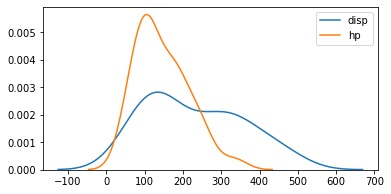

In [147]:
sns.distplot(data[['disp']], hist=False, label='disp')
sns.distplot(data[['hp']], hist=False, label='hp')
plt.legend()

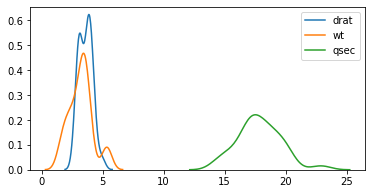

In [148]:
sns.distplot(data[['drat']], hist=False, label='drat')
sns.distplot(data[['wt']], hist=False, label='wt')
sns.distplot(data[['qsec']], hist=False, label='qsec')

In [149]:
print('Carb : ' , data.carb.unique())
print('Gear : ' , data.gear.unique())
print('Cyl : ' , data.cyl.unique())
print('vs : ' , data.vs.unique())
print('am : ' , data.am.unique())

Carb :  [4 1 2 3 6 8]
Gear :  [4 3 5]
Cyl :  [6 4 8]
vs :  [0 1]
am :  [1 0]


Text(0, 0.5, 'Average mpg')

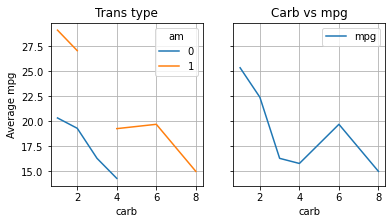

In [150]:
ax1 = plt.subplot(121)
pd.crosstab(index=data.am, columns=data.carb, values=data.mpg, aggfunc='mean').T.plot(grid=True, ax=ax1, title='Trans type')
ax2 = plt.subplot(122, sharey=ax1)
data.groupby('carb')[['mpg']].mean().plot(ax=ax2, grid=True, title='Carb vs mpg')
ax1.set_ylabel('Average mpg')

Text(0, 0.5, 'Average mpg')

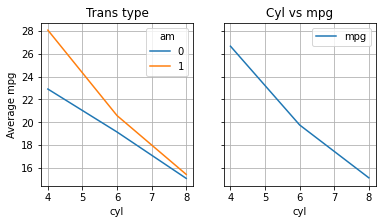

In [151]:
ax1 = plt.subplot(121)
pd.crosstab(index=data.am, columns=data.cyl, values=data.mpg, aggfunc='mean').T.plot(grid=True, ax=ax1, title='Trans type')
ax2 = plt.subplot(122, sharey=ax1)
data.groupby('cyl')[['mpg']].mean().plot(ax=ax2, grid=True, title='Cyl vs mpg')
ax1.set_ylabel('Average mpg')

Text(0, 0.5, 'Average mpg')

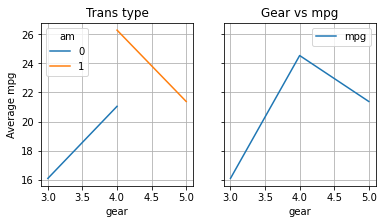

In [152]:
ax1 = plt.subplot(121)
pd.crosstab(index=data.am, columns=data.gear, values=data.mpg, aggfunc='mean').T.plot(grid=True, ax=ax1, title='Trans type')
ax2 = plt.subplot(122, sharey=ax1)
data.groupby('gear')[['mpg']].mean().plot(ax=ax2, grid=True, title='Gear vs mpg')
ax1.set_ylabel('Average mpg')

Text(0, 0.5, 'Average mpg')

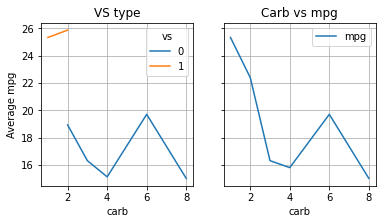

In [153]:
ax1 = plt.subplot(121)
pd.crosstab(index=data.vs, columns=data.carb, values=data.mpg, aggfunc='mean').T.plot(grid=True, ax=ax1, title='VS type')
ax2 = plt.subplot(122, sharey=ax1)
data.groupby('carb')[['mpg']].mean().plot(ax=ax2, grid=True, title='Carb vs mpg')
ax1.set_ylabel('Average mpg')

Text(0, 0.5, 'Average mpg')

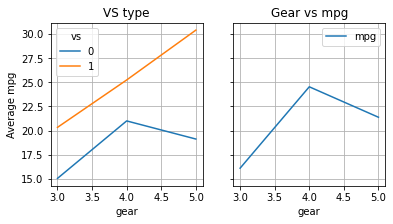

In [154]:
ax1 = plt.subplot(121)
pd.crosstab(index=data.vs, columns=data.gear, values=data.mpg, aggfunc='mean').T.plot(grid=True, ax=ax1, title='VS type')
ax2 = plt.subplot(122, sharey=ax1)
data.groupby('gear')[['mpg']].mean().plot(ax=ax2, grid=True, title='Gear vs mpg')
ax1.set_ylabel('Average mpg')

Text(0, 0.5, 'Average mpg')

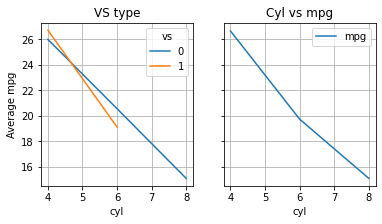

In [155]:
ax1 = plt.subplot(121)
pd.crosstab(index=data.vs, columns=data.cyl, values=data.mpg, aggfunc='mean').T.plot(grid=True, ax=ax1, title='VS type')
ax2 = plt.subplot(122, sharey=ax1)
data.groupby('cyl')[['mpg']].mean().plot(ax=ax2, grid=True, title='Cyl vs mpg')
ax1.set_ylabel('Average mpg')

### Univariate Analysis

### Car_model - variable

In [156]:
data.Car_model.value_counts()

Merc 280C              1
Merc 240D              1
Ferrari Dino           1
Datsun 710             1
Lotus Europa           1
Maserati Bora          1
Dodge Challenger       1
Mazda RX4 Wag          1
Hornet Sportabout      1
Ford Pantera L         1
Toyota Corolla         1
Cadillac Fleetwood     1
Merc 230               1
Toyota Corona          1
Merc 450SLC            1
Porsche 914-2          1
Duster 360             1
Mazda RX4              1
Fiat X1-9              1
Honda Civic            1
Lincoln Continental    1
Merc 280               1
Fiat 128               1
Merc 450SE             1
Hornet 4 Drive         1
AMC Javelin            1
Merc 450SL             1
Chrysler Imperial      1
Volvo 142E             1
Camaro Z28             1
Valiant                1
Pontiac Firebird       1
Name: Car_model, dtype: int64

### mpg - Column analysis

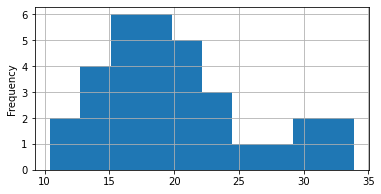

In [157]:
data.mpg.plot(kind='hist')
plt.grid()

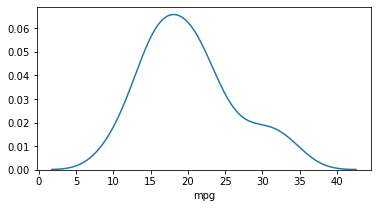

In [158]:
# Density distribution
sns.distplot(data.mpg, hist=False)

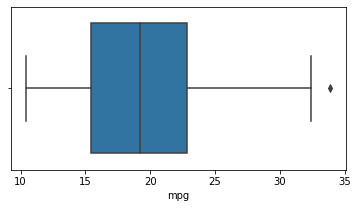

In [159]:
sns.boxplot(data.mpg)

### cyl - Column Analysis

In [160]:
data.cyl.value_counts()

8    14
4    11
6     7
Name: cyl, dtype: int64

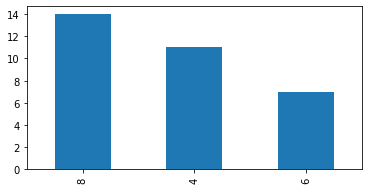

In [161]:
data.cyl.value_counts().plot(kind='bar')

### disp - Column Analysis

In [164]:
data.disp

0     160.0
1     160.0
2     108.0
3     258.0
4     360.0
5     225.0
6     360.0
7     146.7
8     140.8
9     167.6
10    167.6
11    275.8
12    275.8
13    275.8
14    472.0
15    460.0
16    440.0
17     78.7
18     75.7
19     71.1
20    120.1
21    318.0
22    304.0
23    350.0
24    400.0
25     79.0
26    120.3
27     95.1
28    351.0
29    145.0
30    301.0
31    121.0
Name: disp, dtype: float64

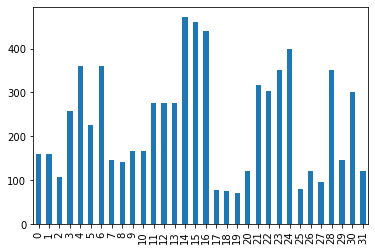

In [53]:
data.disp.plot(kind='bar')

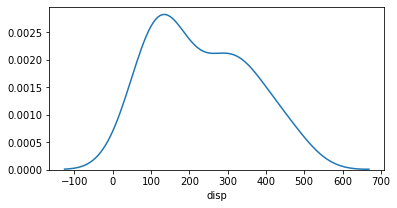

In [165]:
sns.distplot(data.disp, hist=False)

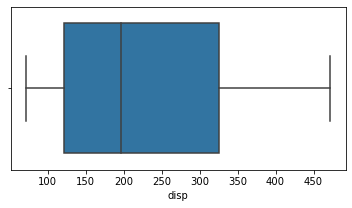

In [166]:
sns.boxplot(data.disp)

In [167]:
data.disp.std()

123.93869383138194

### hp - Column analysis

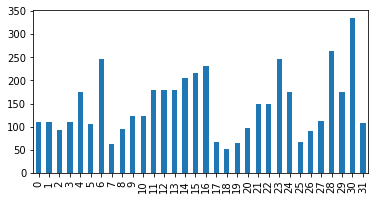

In [168]:
data.hp.plot(kind='bar')

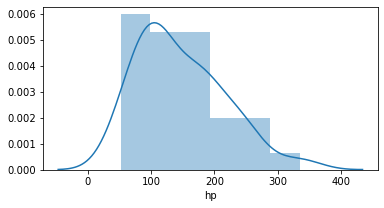

In [169]:
sns.distplot(data.hp, hist=True)

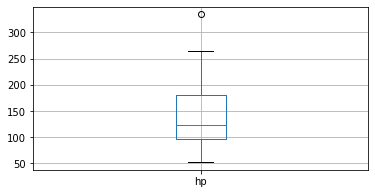

In [170]:
data.hp.plot(kind='box')
plt.grid()

### drat - column analysis

In [172]:
data.drat

0     3.90
1     3.90
2     3.85
3     3.08
4     3.15
5     2.76
6     3.21
7     3.69
8     3.92
9     3.92
10    3.92
11    3.07
12    3.07
13    3.07
14    2.93
15    3.00
16    3.23
17    4.08
18    4.93
19    4.22
20    3.70
21    2.76
22    3.15
23    3.73
24    3.08
25    4.08
26    4.43
27    3.77
28    4.22
29    3.62
30    3.54
31    4.11
Name: drat, dtype: float64

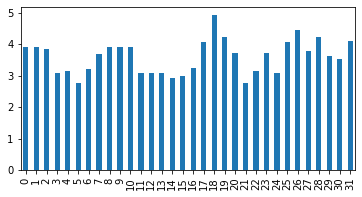

In [171]:
data.drat.plot(kind='bar')

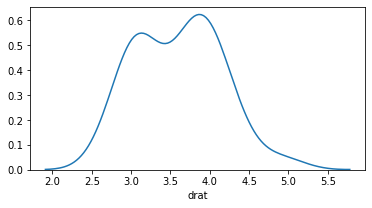

In [173]:
sns.distplot(data.drat, hist = False)

In [174]:
data.drat.mean()

3.5965625000000006

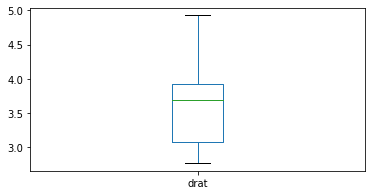

In [175]:
data.drat.plot(kind='box')

### Note: Double peaks, looks like there are 2 groups of data

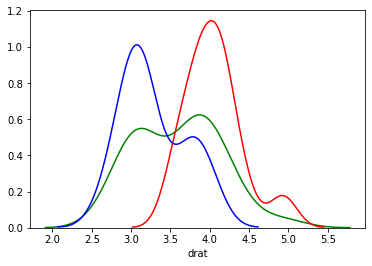

In [64]:
sns.distplot(data.drat, hist = False, kde=True, color='green')
sns.distplot(data[data['am']==1].drat, hist = False, kde=True, color='red')
sns.distplot(data[data['am']==0].drat, hist = False, kde=True, color='blue')

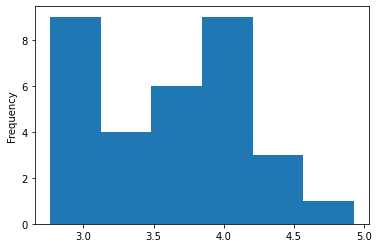

In [65]:
data.drat.plot(kind='hist', bins=6)

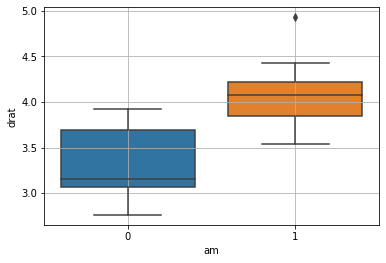

In [66]:
sns.boxplot(y=data.drat, x=data.am)
plt.grid()

### Impression : We will try to avoid this column to build the model

In [176]:
data['drat_group'] = pd.cut(data.drat, bins=2)

In [68]:
data.head(5)

,Car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,drat_group
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,"(3.845, 4.93]"
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,"(3.845, 4.93]"
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,"(3.845, 4.93]"
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,"(2.758, 3.845]"
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,"(2.758, 3.845]"


### wt - Column analysis

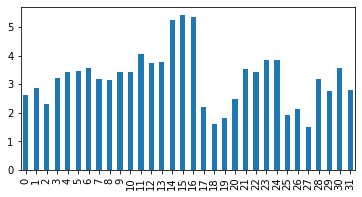

In [177]:
data.wt.plot(kind='bar')

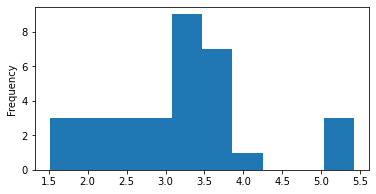

In [178]:
data.wt.plot(kind='hist')

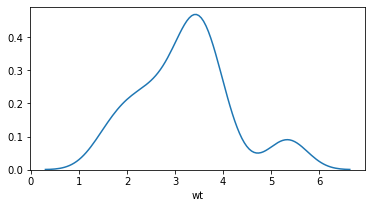

In [179]:
sns.distplot(data.wt, hist=False)

In [72]:
data.columns

Index(['Car_model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb', 'drat_group'],
      dtype='object')

### qsec - Column Analysis

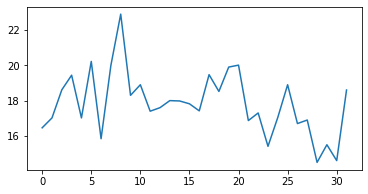

In [180]:
data.qsec.plot()

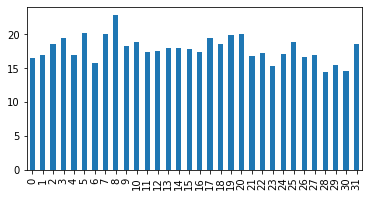

In [181]:
data.qsec.plot(kind='bar')

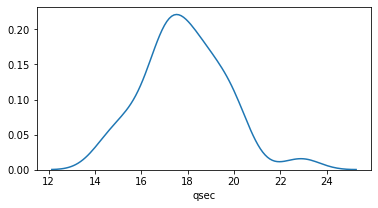

In [182]:
sns.distplot(data.qsec, hist=False)

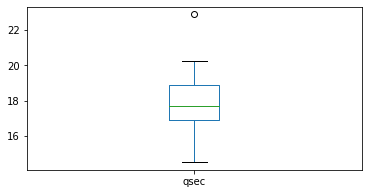

In [183]:
data.qsec.plot(kind='box')

### vs - Column Analysis

In [184]:
data.vs.value_counts()/data.shape[0]

0    0.5625
1    0.4375
Name: vs, dtype: float64

### am - Analysis

In [185]:
data.am.value_counts()/data.shape[0]

0    0.59375
1    0.40625
Name: am, dtype: float64

### gear - Analysis

In [186]:
data.gear.value_counts()/data.shape[0]

3    0.46875
4    0.37500
5    0.15625
Name: gear, dtype: float64

### Multivariate analysis

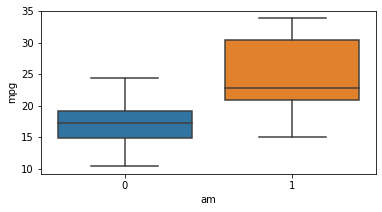

In [187]:
sns.boxplot(y='mpg', x='am', data=data)

In [189]:
data.groupby('am').mpg.mean()

am
0    17.147368
1    24.392308
Name: mpg, dtype: float64

### Linearity

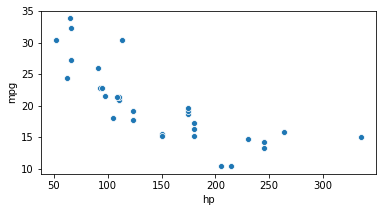

In [191]:
sns.scatterplot(x='hp', y='mpg', data=data)

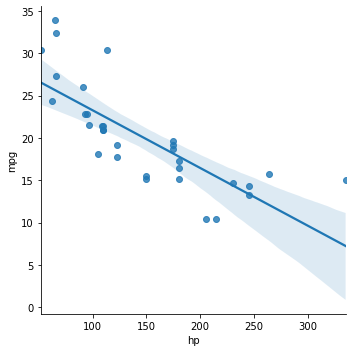

In [192]:
sns.lmplot(x='hp', y='mpg', data=data)

### Note: hp and mpg has negative correlation

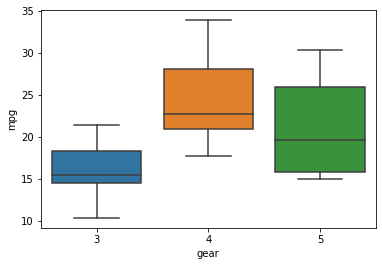

In [84]:
sns.boxplot(y='mpg', x='gear', data=data)

In [195]:
data[['mpg','gear']].corr(method='spearman')

,mpg,gear
mpg,1.000000,0.542782
gear,0.542782,1.000000


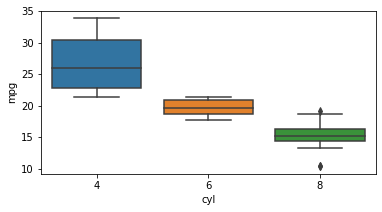

In [196]:
sns.boxplot(y='mpg', x='cyl', data=data)

In [197]:
data[['mpg','cyl']].corr(method='spearman')

,mpg,cyl
mpg,1.000000,-0.910801
cyl,-0.910801,1.000000


### Multivariate Analysis

### Correlation Coefficients

In [198]:
data[['mpg','disp','hp','drat','wt','qsec']].corr()

,mpg,disp,hp,drat,wt,qsec
mpg,1.000000,-0.847551,-0.776168,0.681172,-0.867659,0.418684
disp,-0.847551,1.000000,0.790949,-0.710214,0.887980,-0.433698
hp,-0.776168,0.790949,1.000000,-0.448759,0.658748,-0.708223
drat,0.681172,-0.710214,-0.448759,1.000000,-0.712441,0.091205
wt,-0.867659,0.887980,0.658748,-0.712441,1.000000,-0.174716
qsec,0.418684,-0.433698,-0.708223,0.091205,-0.174716,1.000000


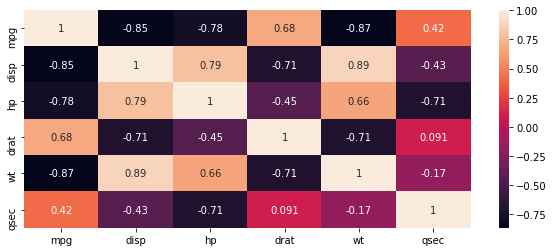

In [199]:
# Continuous numbers
plt.figure(figsize=(10,4))
sns.heatmap(data[['mpg','disp','hp','drat','wt','qsec']].corr(), annot=True)

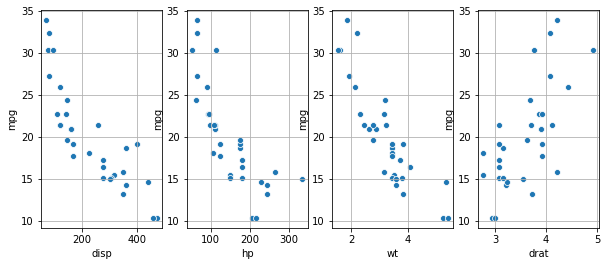

In [200]:
plt.figure(figsize=(10,4))
ax1 = plt.subplot(141)
sns.scatterplot(x='disp', y='mpg', data=data)
plt.grid()
plt.subplot(142, sharey=ax1)
sns.scatterplot(x='hp', y='mpg', data=data)
plt.grid()
plt.subplot(143, sharey=ax1)
sns.scatterplot(x='wt', y='mpg', data=data)
plt.grid()
plt.subplot(144, sharey=ax1)
sns.scatterplot(x='drat', y='mpg', data=data)
plt.grid()

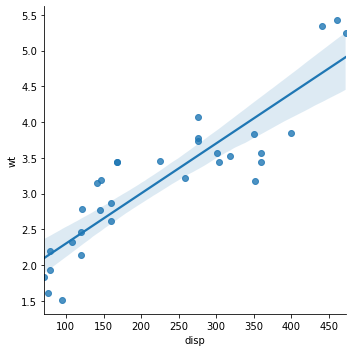

In [201]:
sns.lmplot(x='disp', y='wt', data=data)

### 3 Attributes

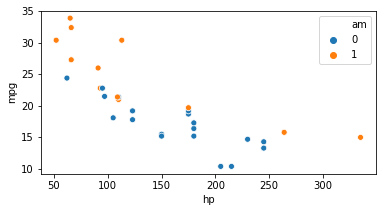

In [202]:
sns.scatterplot(x='hp', y='mpg', hue='am', data=data)

### 5 Attributes

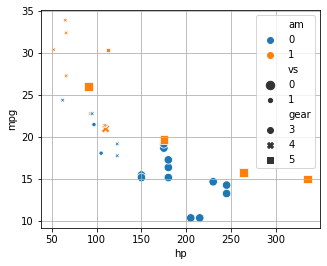

In [203]:
rcParams['figure.figsize'] = [5,4]
sns.scatterplot(x='hp', y='mpg', hue='am', size='vs', style='gear', data=data)
plt.grid()

### Check Outliers on disp

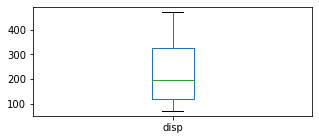

In [204]:
rcParams['figure.figsize'] =[5,2]
data.disp.plot(kind='box')

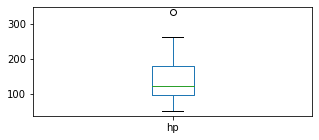

In [205]:
data.hp.plot(kind='box')

### Find out Quartiles

In [206]:
q1,q2,q3 = np.quantile(data.hp, q= [0.25, 0.5, 0.75] )

In [207]:
# Interquartile
iqr = q3-q1

In [208]:
lower = q1 + 1.5*iqr
upper = q3 + 1.5*iqr

### Remove the outliers

In [209]:
data[data.hp>upper]

,Car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,drat_group
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8,"(2.758, 3.845]"


In [210]:
data.drop(data[data.hp>upper].index, inplace=True)

### Check outliers on wt

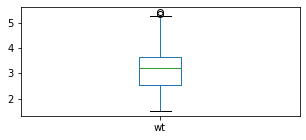

In [211]:
data.wt.plot(kind='box')

### Find out quartiles

In [212]:
q1,q2,q3 = np.quantile(data.wt,q= [0.25, 0.5, 0.75] )

In [213]:
# Interquartile
iqr = q3-q1
lower = q1 + 1.5*iqr
upper = q3 + 1.5*iqr

### Drop the outliers

In [214]:
data[data.wt>upper]

,Car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,drat_group
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4,"(2.758, 3.845]"
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4,"(2.758, 3.845]"


In [215]:
data.drop(data[data.wt>upper].index, inplace=True)

### Feature Selection

In [104]:
data.head(2)

,Car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,drat_group
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4,"(3.845, 4.93]"
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4,"(3.845, 4.93]"


In [253]:
# X = data.loc[:,['disp','wt']]            # No 1  0.7684393510466051
# X = data.loc[:,['wt']]                   # No 2  0.716535937293294
# X = data.loc[:,['disp']]                 # No 3  0.7014801525458915
# X = data.loc[:,['disp','hp']]                             # No 4
# X = data.loc[:,['disp','hp','drat']]                      # No 5
# X = data.loc[:,['disp','hp','drat','qsec']]               # No 6
# X = data.loc[:,['disp','hp','drat','wt','qsec']]          # No 7
# X = data.loc[:,['hp','drat','wt','qsec']]                 # No 8 Best model
y = data.mpg

### Training and Testing

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)  # tested with 42

In [255]:
X_train.shape, X_test.shape

((20, 1), (9, 1))

In [256]:
y_train.shape, y_test.shape

((20,), (9,))

### Base model

In [257]:
data.mpg.mean()

20.78620689655172

In [258]:
y_test

2     22.8
22    15.2
25    27.3
13    15.2
11    16.4
27    30.4
29    19.7
28    15.8
5     18.1
Name: mpg, dtype: float64

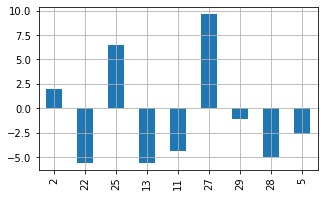

In [259]:
base_model_residual = y_test - data.mpg.mean()
base_model_residual.plot(kind='bar', figsize=(5,3))
plt.grid()

In [260]:
# Base model Error - 
np.sqrt(mean_squared_error(y_test, [data.mpg.mean() for i in range(len(y_test))]))

5.310554680632359

### Build the model

In [261]:
# model = LinearRegression()
#model = Lasso()
#model = Ridge()               # For this dataset this is the best model
#model = ElasticNet()

### Train the model

In [262]:
model.fit(X_train, y_train)

LinearRegression()

### Model variable coefficients

In [263]:
feature_importance = pd.DataFrame( {'Coefficient' : model.coef_}, index=X.columns).sort_values('Coefficient', ascending=False)
feature_importance['Abs'] = np.abs(feature_importance.Coefficient)
feature_importance.sort_values('Abs', ascending = False)

,Coefficient,Abs
disp,-0.040953,0.040953


### Model intercept

In [264]:
model.intercept_

29.947715972808375

### Test the model using training data

In [265]:
y_predict = model.predict(X_train)
r2_score(y_train, y_predict)

0.6706695985322064

### Test the model using testing data

In [266]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.7014801525458915

In [267]:
y_predict

array([25.52483895, 17.49813622, 26.71246334, 18.65299855, 18.65299855,
       26.05312704, 24.00959405, 15.57336566, 20.73338885])

In [268]:
y_test

2     22.8
22    15.2
25    27.3
13    15.2
11    16.4
27    30.4
29    19.7
28    15.8
5     18.1
Name: mpg, dtype: float64

### Residuals / Errors

In [269]:
# Actual - Predicted values
residual = y_test - y_predict

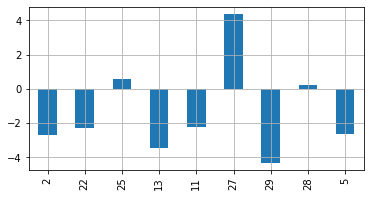

In [270]:
rcParams['figure.figsize'] =[6,3]
residual.plot(kind='bar')
plt.grid()

In [271]:
print(f'Mean squared error :  {mean_squared_error(y_test, y_predict)}')
np.sqrt(mean_squared_error(y_test, y_predict))

Mean squared error :  8.278287058621823


2.8772012544522885

### Test normality of Residuals

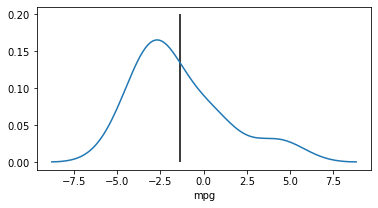

In [272]:
sns.distplot(residual, hist=False)
plt.vlines(np.mean(residual), 0, 0.2)

In [273]:
normaltest(residual)

C:\Users\Basu20\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=5.140523848327173, pvalue=0.07651550154029502)

# Note: Parameters are within the limit

In [274]:
dd=pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})

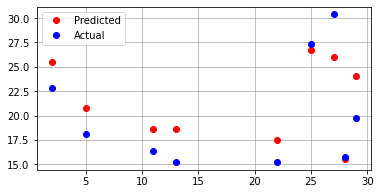

In [275]:
plt.plot(dd.Predicted, 'ro', label='Predicted')
plt.plot(dd.Actual, 'bo', label='Actual')
plt.legend()
plt.grid()

### Cross Validation